In [1]:
import numpy as np
import pandas as pd

In [ ]:
# !python3 -m pip install xlrd
# !conda install -c anaconda xlrd --yes

In [50]:
df_can = pd.read_excel('./Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2,
)
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'], dtype=object)

In [132]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719.0
Sao Tome and Principe,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,0,...,1,1,0,0,1,2,0,0,1,2726.0
Canada,Northern America,Northern America,Developed regions,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,2731.0
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2739.0
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,2744.0


In [52]:
df_can.rename(columns={ 'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df_can.columns
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

df_can.drop([f'Unnamed: {x}' for x in range(43, 51)], axis=1, inplace=True)

In [53]:
df_can.head()
df_can.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,35930.984615
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,92040.242971
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2719.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,3718.500000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,8695.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,24973.500000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,699242.000000


In [25]:
# Filtering and condition
df_can[['Country', 'Continent', 'Region']]

df_can[['Country', 'Continent', 'Region']][df_can['Region'] == 'Southern Asia']
df_can[df_can['Region'] == 'Southern Asia'].T

,0,14,20,79,81,106,121,130,162
Country,Afghanistan,Bangladesh,Bhutan,India,Iran (Islamic Republic of),Maldives,Nepal,Pakistan,Sri Lanka
Continent,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia
Region,Southern Asia,Southern Asia,Southern Asia,Southern Asia,Southern Asia,Southern Asia,Southern Asia,Southern Asia,Southern Asia
DevName,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions
1980,16,83,0,8880,1172,0,1,978,185
1981,39,84,0,8670,1429,0,1,972,371
1982,39,86,0,8147,1822,0,6,1201,290
1983,47,81,0,7338,1592,1,1,900,197
1984,71,98,1,5704,1977,0,2,668,1086
1985,340,92,0,4211,1648,0,4,514,845


In [34]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [35]:
mpl.__version__

'3.4.0'

In [36]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://miro.medium.com/max/1540/1*Rkd2xDJjDwA_mEpz5KNlJg.png')

In [57]:
df_can.set_index('Country', inplace=True)


Type                              Immigrants
Coverage                          Foreigners
AREA                                     904
Continent    Latin America and the Caribbean
REG                                      915
Region                             Caribbean
DEV                                      902
DevName                   Developing regions
1980                                    1666
1981                                    3692
1982                                    3498
1983                                    2860
1984                                    1418
1985                                    1321
1986                                    1753
1987                                    2132
1988                                    1829
1989                                    2377
1990                                    2379
1991                                    2829
1992                                    2399
1993                                    3655
1994      

In [63]:
years = list(range(1980, 2014))

# df_can.head()
haiti = df_can.loc['Haiti', years]
# df_can.info()


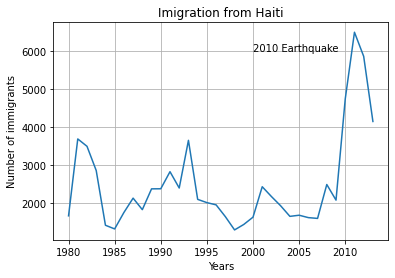

In [73]:
# haiti.plot().grid()

# haiti.index = haiti.index.map(int)
haiti.plot(kind='line').grid()
# haiti.index

plt.title('Imigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake')
plt.show()

In [74]:
China_India = df_can.loc[['China', 'India'], years]
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


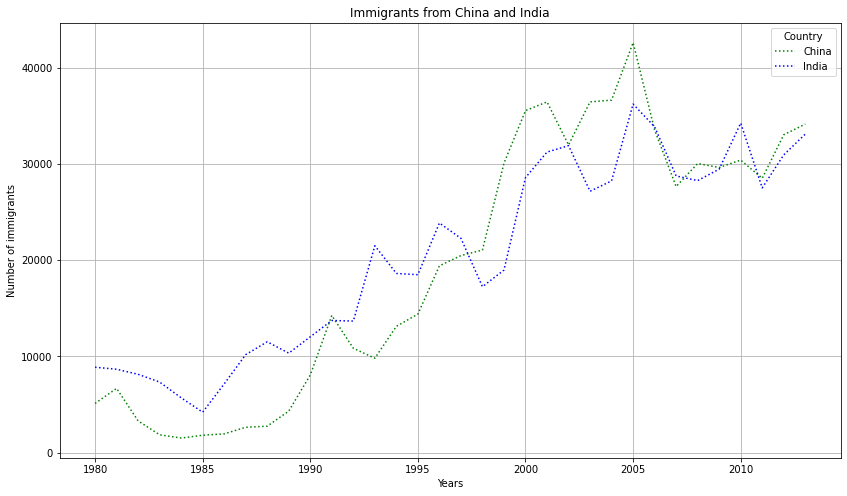

In [85]:
# China_India.plot(kind='line')
df_ci = China_India.transpose()
df_ci.head()

df_ci.plot(kind='line', figsize=(14, 8), color=['green', 'blue'], linestyle=':').grid()
plt.title('Immigrants from China and India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

In [86]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


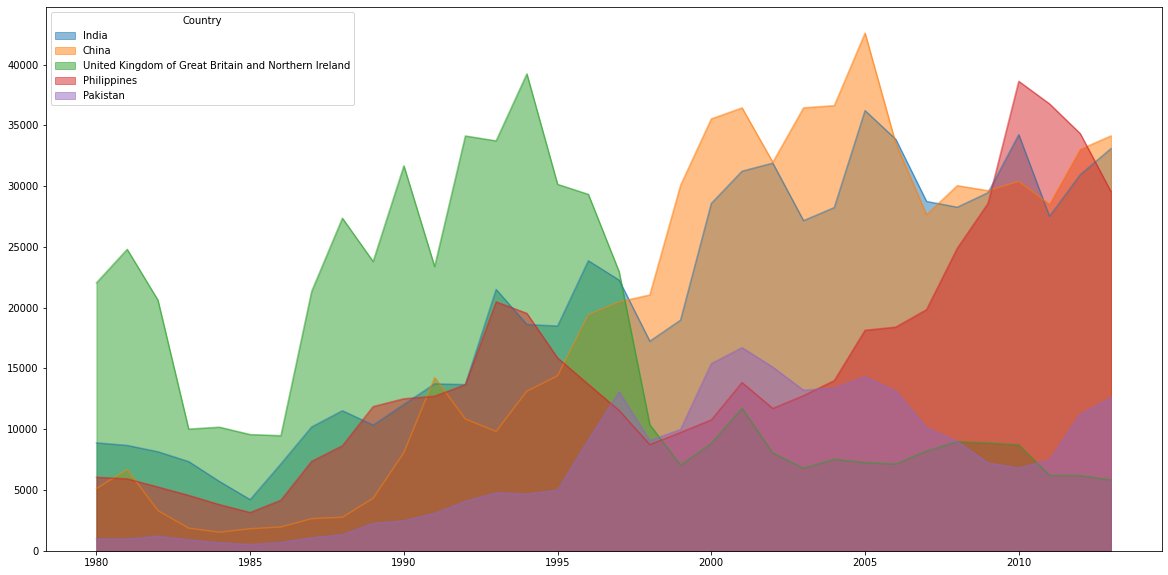

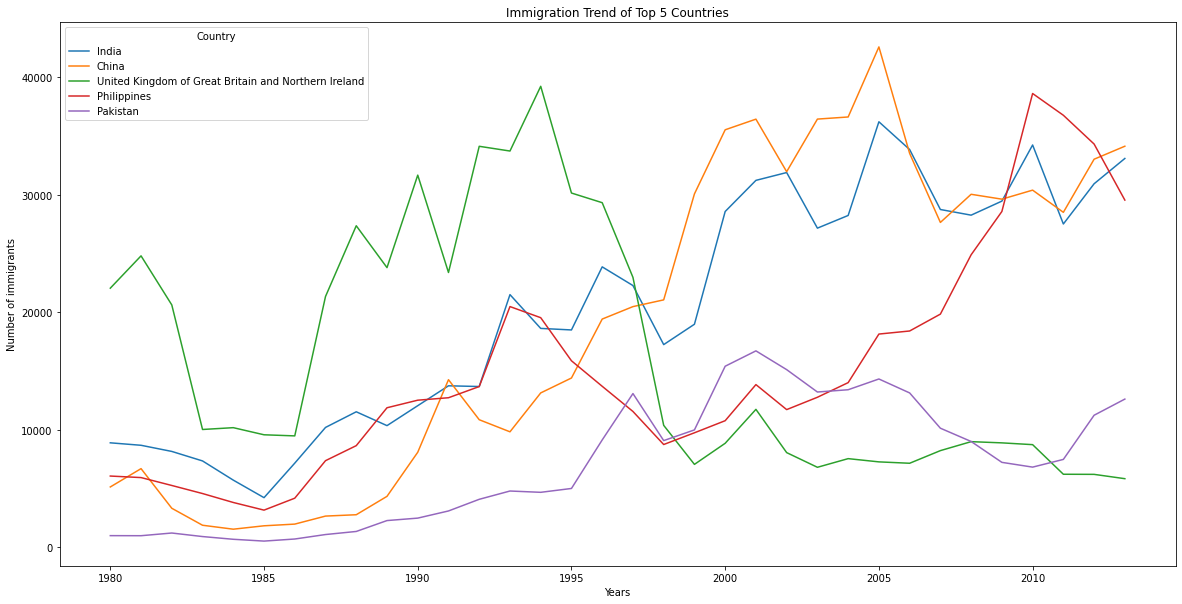

In [93]:
# Two types of plotting
# Option 1 Scripting Layer

df_top5.plot(
    kind='area',
    stacked=False,
    figsize=(20, 10),
)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

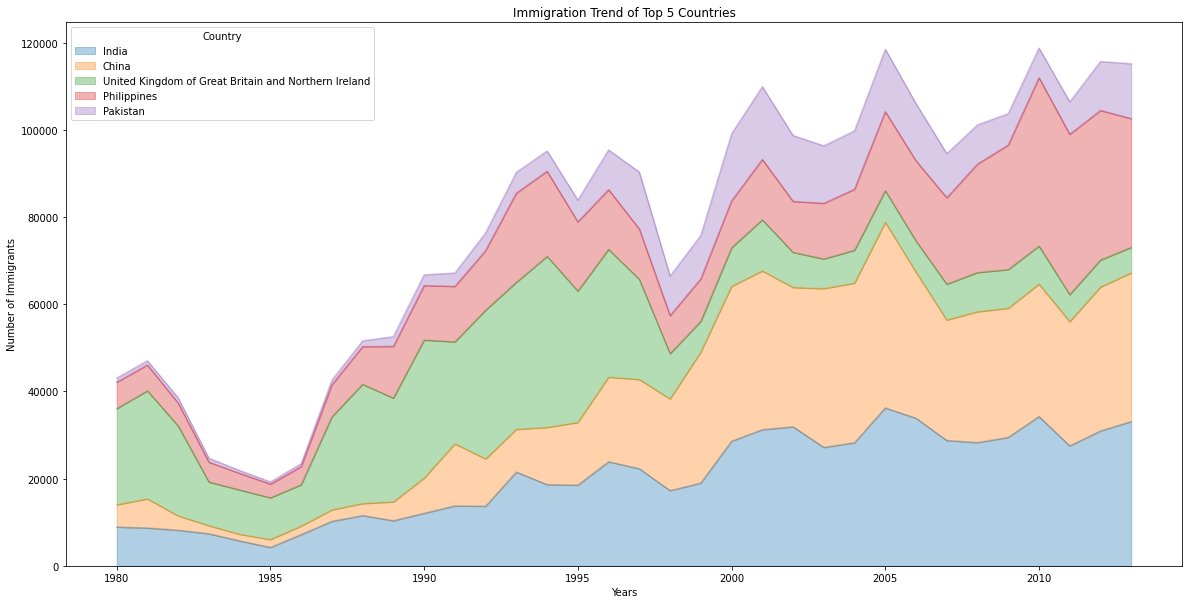

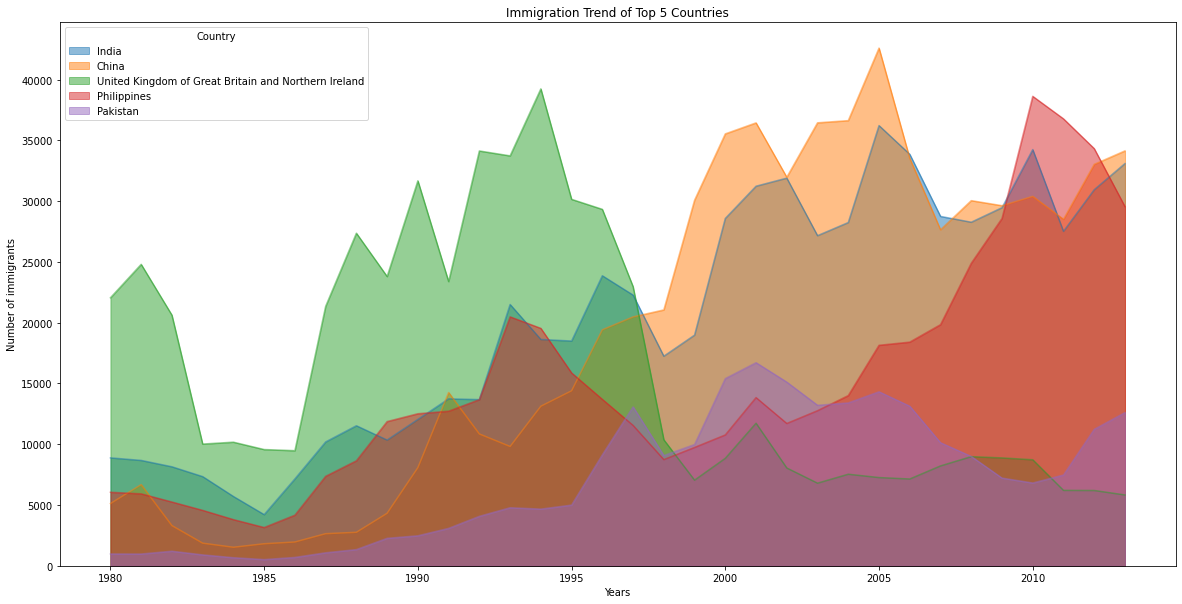

In [95]:
# Option 2 Artist Layer
visual1 = df_top5.plot(kind='area', alpha=0.35, figsize=(20,10))
visual1.set_title('Immigration Trend of Top 5 Countries')
visual1.set_ylabel('Number of Immigrants')
visual1.set_xlabel('Years')

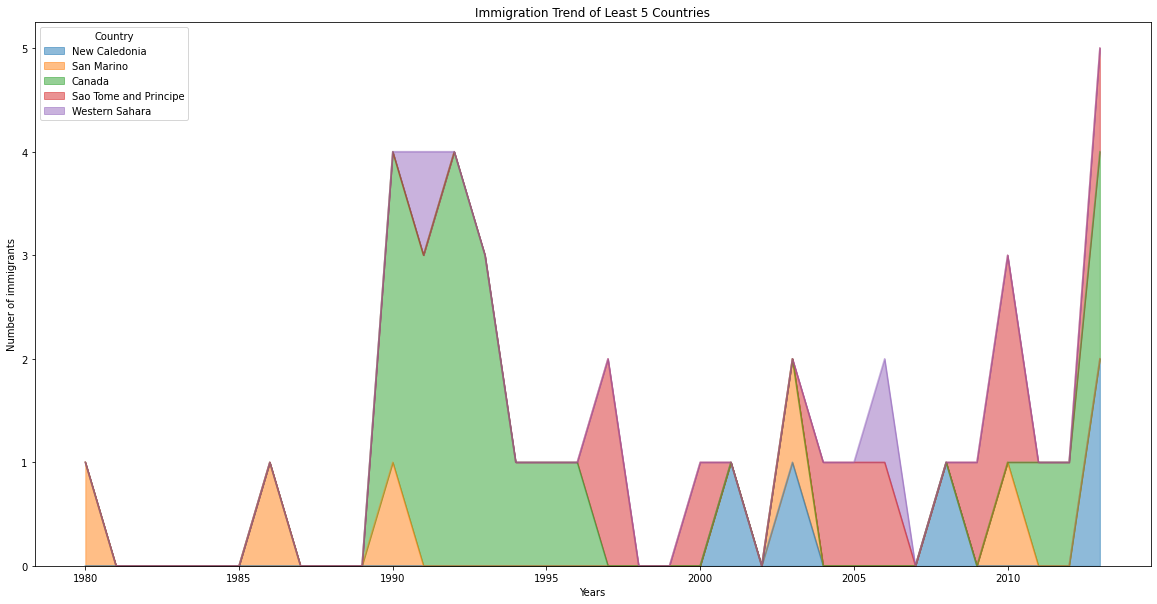

In [96]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()

df_least5.plot(kind='area', alpha=0.5, stacked=True, figsize=(20, 10))

plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

[ 31.          49.46666667  67.93333333  86.4        104.86666667
 123.33333333 141.8        160.26666667 178.73333333 197.2
 215.66666667 234.13333333 252.6        271.06666667 289.53333333
 308.        ] [ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]


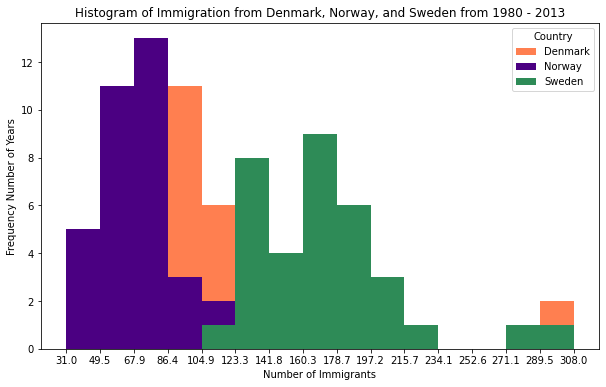

In [114]:
# Histogram
# 
df_den_nor_sweden = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
count, bin_edges = np.histogram(df_den_nor_sweden, 15)

df_den_nor_sweden.head()

df_den_nor_sweden.plot(kind='hist', figsize=(10, 6), bins=15, xticks=bin_edges, color=['coral', 'indigo', 'seagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Frequency Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

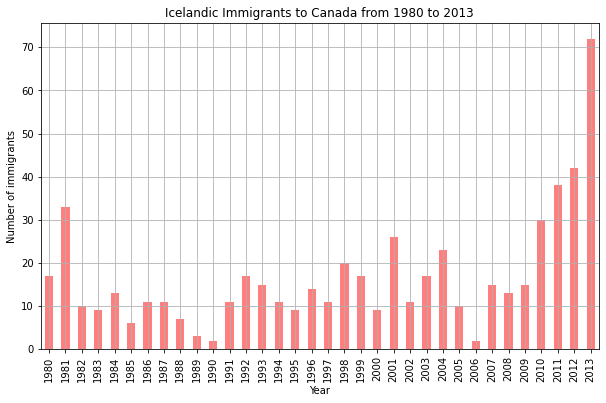

In [119]:
# Bar charts
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6), color='red', alpha=0.5).grid()
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.show()

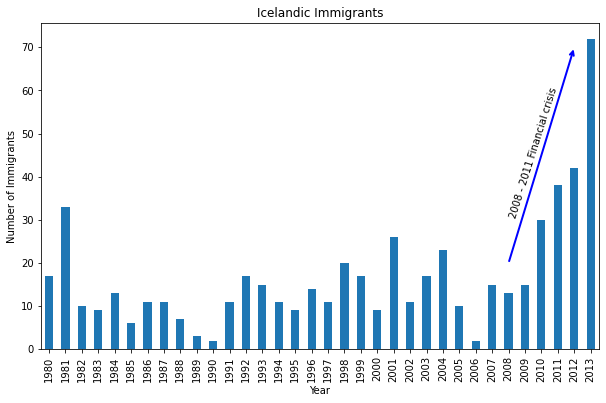

In [127]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants')
plt.annotate('', xy=(32, 70), xytext=(28, 20), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)) # garis biru

plt.annotate(
    '2008 - 2011 Financial crisis',
    xy=(28,30),
    rotation=72.5,
    va='bottom',
    ha='left'
)
    # text tambahan di garis biru
plt.show()

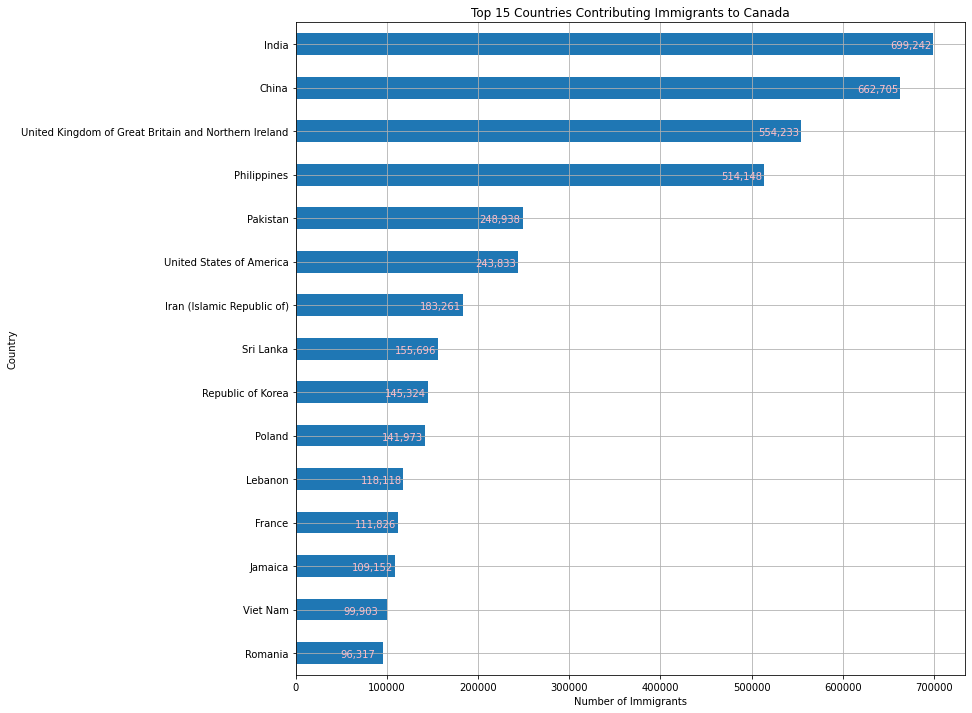

In [130]:
# horizontal bar
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15.plot(kind='barh', figsize=(12, 12)).grid()
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing Immigrants to Canada')
for index, value in enumerate(df_top15):
    label= format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='pink')
plt.show()

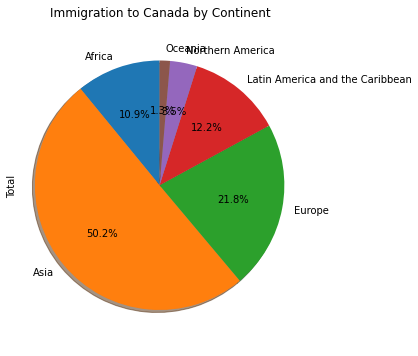

In [134]:
# Pie Charts

df_continents = df_can.groupby('Continent', axis=0).sum()

df_continents.head()

df_continents['Total'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Immigration to Canada by Continent')
plt.axis('equal')
plt.show()

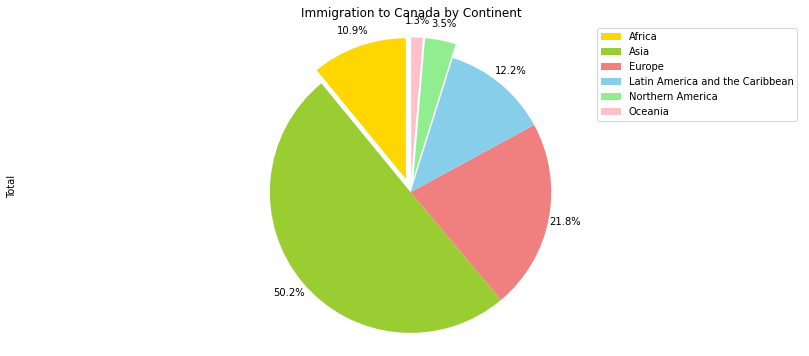

                                  1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   

                                  1986   1987   1988   1989  ...    2005  \
Continent                                                    ...           
Africa                            3782   7494   7552   9894  ...   27523   
Asia                             28739  43203  47454  60256  ...  159253   
Europe                           24370  46698  54726  60893  ...   35955   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24747   
Nort

In [138]:
df_continents = df_can.groupby('Continent', axis=0).sum()

df_continents.head()

df_continents['Total'].plot(
    kind='pie',
    figsize=(14, 6),
    autopct='%1.1f%%',
    startangle=90,
    labels=None,
    pctdistance=1.12,
    colors=['gold', 'yellowgreen', 'lightcoral', 'skyblue', 'lightgreen', 'pink'],
    explode=[0.1, 0, 0, 0, 0.1, 0.1]
)
plt.title('Immigration to Canada by Continent')
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper right')
plt.show()


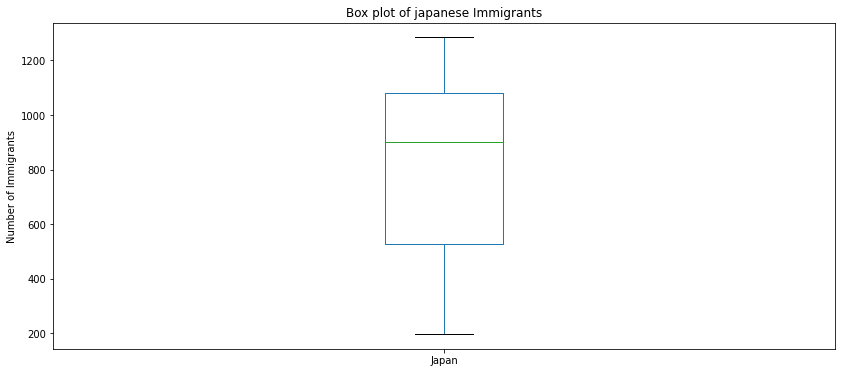

In [141]:
# Box Plot
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

df_japan.plot(kind='box', figsize=(14, 6))
plt.title('Box plot of japanese Immigrants')
plt.ylabel('Number of Immigrants')
plt.show()



In [142]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Country         China         India
count       34.000000     34.000000
mean     19410.647059  20350.117647
std      13568.230790  10007.342579
min       1527.000000   4211.000000
25%       5512.750000  10637.750000
50%      19945.000000  20235.000000
75%      31568.500000  28699.500000
max      42584.000000  36210.000000


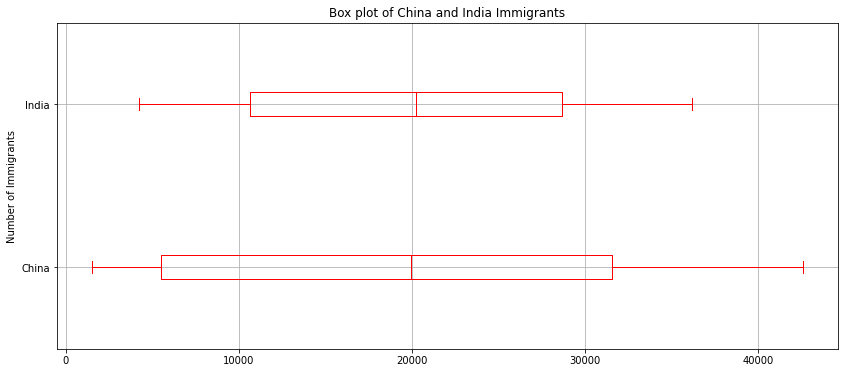

In [148]:
df_ci.head()
print(df_ci.describe())

# df_ci.plot(kind='box', figsize=(14,6), color='red').grid()
df_ci.plot(kind='box', figsize=(14,6), color='red', vert=False).grid()
plt.title('Box plot of China and India Immigrants')
plt.ylabel('Number of Immigrants')
plt.show()

/Users/admin/Documents/learn-project/python/hitchiker/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/admin/Documents/learn-project/python/hitchiker/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


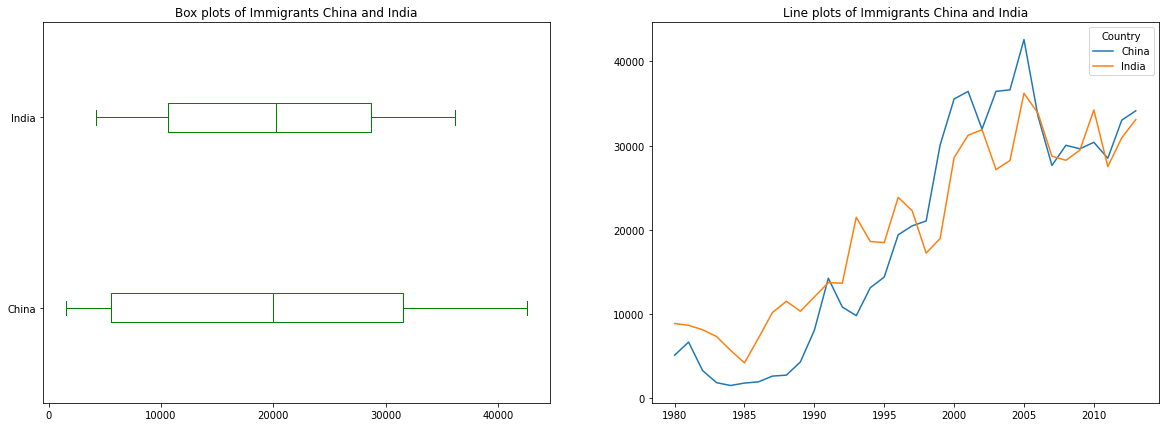

In [149]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
df_ci.plot(kind='box', color='green', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box plots of Immigrants China and India')

df_ci.plot(kind='line', figsize=(20, 7), ax=ax1)
ax1.set_title('Line plots of Immigrants China and India')
plt.show()

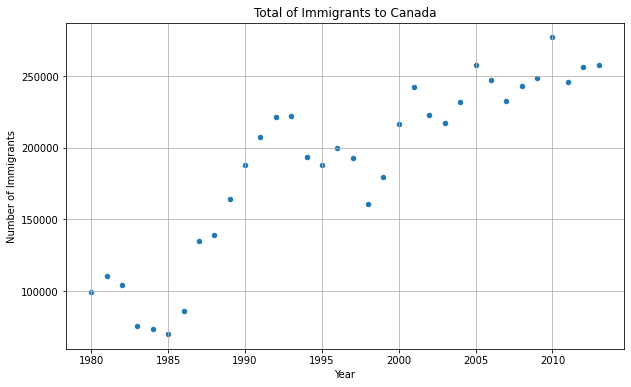

In [154]:
# Scatter plots
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
# df_tot.head()
df_tot.columns=['year', 'total']
df_tot.head()

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6)).grid()
plt.title('Total of Immigrants to Canada')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

In [156]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [157]:
!pip install numpy